In [2]:
import pandas as pd
import numpy as np 

import os

import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img
import time 

from skimage.io import imread,imsave

import matplotlib.pyplot as plt
from glob import glob

In [3]:
input_dir = r'C:\Users\90541\Desktop\Yapay Zeka\Udemy Yapay Zeka\İleri Seviye Deep Learning DataAI\1) CNN Review\BrainTumor2DProjesi\braintumor2d\Brain Tumor Classification 2D\Brain Tumor Classification 2D'

In [4]:
categories=["Astrocytoma","Glioblastoma","Gliomas","Meningioma","Neurocytoma"]

In [5]:
def delete_mask(input_dir,categories):
    deleted_file=[]
    for category in categories:
        category_path = os.path.join(input_dir, category)
        images = os.listdir(category_path)
        
        for filename in images:
            if "mask" in filename:
                file_path = os.path.join(category_path, filename)
                os.remove(file_path)
                deleted_file.append(1)
    print("Number of deleted file: ",len(deleted_file))

In [6]:
delete_mask(input_dir,categories)

Number of deleted file:  3349


In [7]:
import shutil

def split_train_val_test(input_dir, categories, train_ratio=0.7, val_ratio=0.2,test_ratio=0.1,seed=42):
    np.random.seed(seed)
    
    for category in categories:
        category_path = os.path.join(input_dir, category)
        images = os.listdir(category_path)
        np.random.shuffle(images)
        
        # Eğitim, doğrulama ve test setleri için sınırlar belirle
        total_count = len(images)
        train_count = int(train_ratio * total_count)
        val_count = int(val_ratio * total_count)
        
        # Eğitim, doğrulama ve test setlerini oluştur
        train_images = images[:train_count]
        val_images = images[train_count:train_count + val_count]
        test_images = images[train_count + val_count:]
        
        train_dir = os.path.join(input_dir, 'train', category)
        val_dir = os.path.join(input_dir, 'val', category)
        test_dir = os.path.join(input_dir, 'test', category)
        
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)
        
        # Görselleri train dizinine taşı
        for img in train_images:
            shutil.move(os.path.join(category_path, img), os.path.join(train_dir, img))
        
        for img in val_images:
            shutil.move(os.path.join(category_path, img), os.path.join(val_dir, img))
        
        for img in test_images:
            shutil.move(os.path.join(category_path, img), os.path.join(test_dir, img))
        
        # Orijinal kategori dizini boşsa, sil
        if not os.listdir(category_path):
            os.rmdir(category_path)

In [8]:
split_train_val_test(input_dir, categories) 

In [9]:
train_path = r'C:\Users\90541\Desktop\Yapay Zeka\Udemy Yapay Zeka\İleri Seviye Deep Learning DataAI\1) CNN Review\BrainTumor2DProjesi\braintumor2d\Brain Tumor Classification 2D\Brain Tumor Classification 2D\train'
test_path = r'C:\Users\90541\Desktop\Yapay Zeka\Udemy Yapay Zeka\İleri Seviye Deep Learning DataAI\1) CNN Review\BrainTumor2DProjesi\braintumor2d\Brain Tumor Classification 2D\Brain Tumor Classification 2D\test'
val_path = r'C:\Users\90541\Desktop\Yapay Zeka\Udemy Yapay Zeka\İleri Seviye Deep Learning DataAI\1) CNN Review\BrainTumor2DProjesi\braintumor2d\Brain Tumor Classification 2D\Brain Tumor Classification 2D\val'

<function matplotlib.pyplot.show(close=None, block=None)>

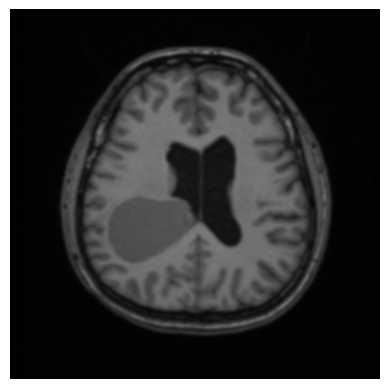

In [10]:
img=load_img(train_path + r"\Astrocytoma\Astrocytoma_T1_006.tif" )

plt.imshow(img)
plt.axis("off")
plt.show

In [11]:
datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator=datagen.flow_from_directory(
    train_path,
    target_size=(200,200), 
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical"
) 

test_generator=datagen.flow_from_directory(
    test_path,
    target_size=(200,200), 
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical"
) 

val_generator=datagen.flow_from_directory(
    val_path,
    target_size=(200,200), 
    batch_size=32,
    color_mode="rgb", 
    class_mode="categorical"
)

Found 2423 images belonging to 5 classes.
Found 351 images belonging to 5 classes.
Found 691 images belonging to 5 classes.


In [25]:
model = Sequential()

model.add(Conv2D(16,(5,5),input_shape=(200,200,3))) #en düşük görsel 240 pxti
model.add(Activation("relu"))
model.add(MaxPooling2D()) #default olarak (2,2) gelir

model.add(Conv2D(16,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("swish"))
model.add(Dense(64))
model.add(Activation("swish"))
model.add(Dense(5)) #numberofclass
model.add(Activation("softmax"))

In [26]:
from keras.optimizers import Adam

optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [27]:
start_time = time.time()

hist=model.fit_generator(
    generator=train_generator,
    epochs=5,
    validation_data=val_generator,
)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time / 60:.2f} minutes")

Epoch 1/5
76/76 [==============================] - 17s 206ms/step - loss: 0.3032 - accuracy: 0.8923 - val_loss: 0.0775 - val_accuracy: 0.9682
Epoch 2/5
76/76 [==============================] - 16s 207ms/step - loss: 0.0917 - accuracy: 0.9682 - val_loss: 0.0905 - val_accuracy: 0.9682
Epoch 3/5
76/76 [==============================] - 15s 195ms/step - loss: 0.0250 - accuracy: 0.9905 - val_loss: 0.0728 - val_accuracy: 0.9667
Epoch 4/5
76/76 [==============================] - 15s 202ms/step - loss: 0.0329 - accuracy: 0.9880 - val_loss: 0.0762 - val_accuracy: 0.9797
Epoch 5/5
76/76 [==============================] - 17s 215ms/step - loss: 0.0277 - accuracy: 0.9876 - val_loss: 0.0647 - val_accuracy: 0.9740
Training time: 1.32 minutes


In [31]:
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f'Test accuracy: {test_acc}')

11/11 [==============================] - 4s 334ms/step - loss: 0.0526 - accuracy: 0.9858
Test accuracy: 0.9857549667358398


In [28]:
model.save_weights("deneme100epochss.h5")

In [29]:
# save history
import json
with open("deneme.json","w") as f:
    json.dump(hist.history,f)

In [30]:
# load history
import codecs
with codecs.open("deneme.json","r",encoding="utf-8") as f:
    h=json.loads(f.read())

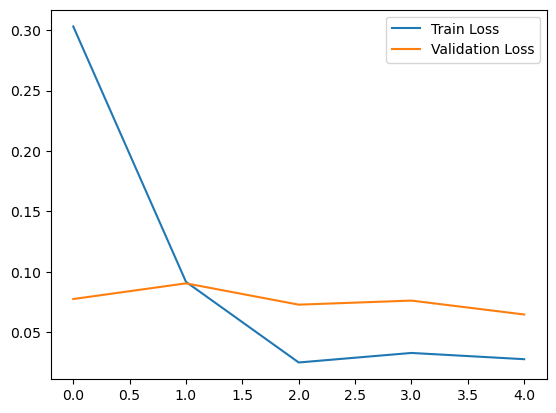

In [32]:
plt.plot(h["loss"],label="Train Loss")
plt.plot(h["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

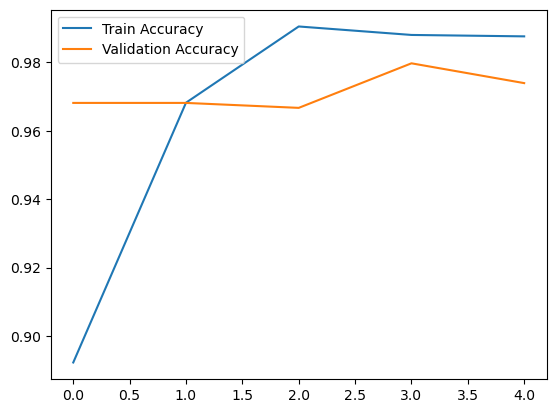

In [33]:
plt.plot(h["accuracy"],label="Train Accuracy")
plt.plot(h["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.show()